In [27]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu121'

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Get the data
In this tutorial we use subsample of Food101 dataset.<br>
We will load it in format of folders, where images are labeled by the folder they are in

In [29]:
import requests
import zipfile
from pathlib import Path


data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"  # just as in tutorial

if image_path.is_dir():
  print("Directory already exists")
else:
  print(f"Creating {image_path}")
  image_path.mkdir(parents=True, exist_ok=True)

  # load data to zip archive
  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data....")
    f.write(request.content)

  # Unzip data from archive
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping data...")
    zip_ref.extractall(image_path)

Directory already exists


## Data Exploration

In [30]:
import os


def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi


In [31]:
train_dir = image_path / "train"
test_dir = image_path / "test"

**Let's visualize a random image**

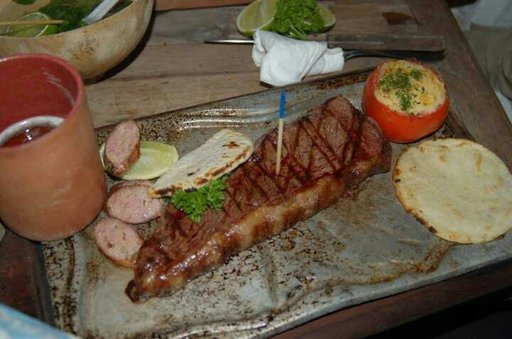

In [32]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))  # all .jpg files
random_image_path = random.choice(image_path_list)
Image.open(random_image_path)  # looks tasty btw.

## Data Preparation

In [33]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [34]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

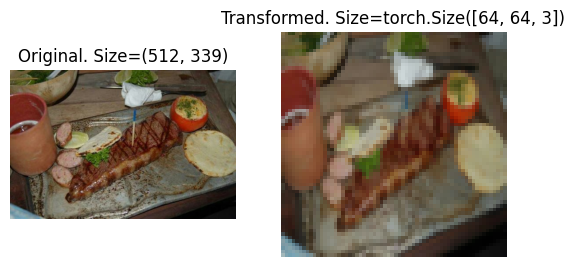

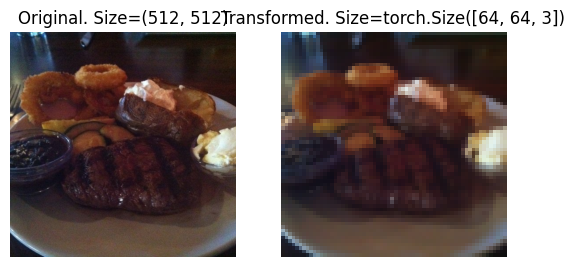

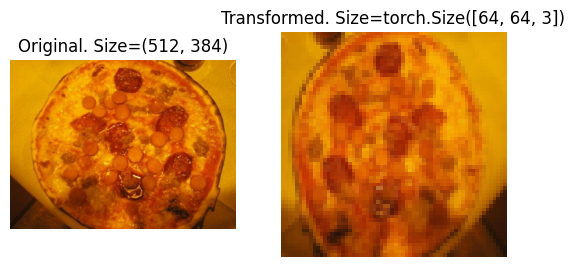

In [35]:
def plot_transforms(image_paths, transform, seed=42):
  random.seed(seed)
  random_img_paths = random.sample(image_paths, k=3)
  for image_path in random_img_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original. Size={f.size}")
      ax[0].axis("off")

      transformed_img = transform(f).permute(1, 2, 0)  # channels last (first by default)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed. Size={transformed_img.shape}")
      ax[1].axis("off")

plot_transforms(image_path_list, data_transform)

# **Converting to Dataset**

## Option 1.  ImageFolder

In [36]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [37]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [38]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [39]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [40]:
len(train_data), len(test_data)

(225, 75)

as I undersood, permute is a tensor method that swaps axises.<br>
In code below it takes 1st dim (height) and replaces it by the second

torch.Size([64, 64, 3])


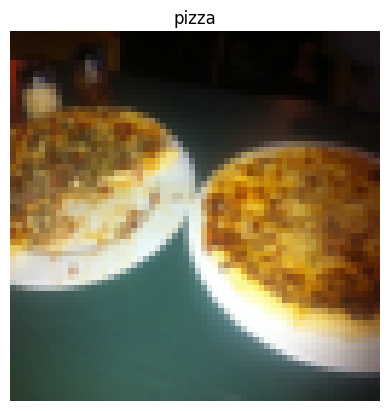

In [47]:
image, label = train_data[0]
plt.title(class_names[label])
plt.axis("off")
print(image.permute(1, 2, 0).size())
plt.imshow(image.permute(1, 2, 0));